## Interpertração de modelo de machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import seaborn as sns 
import warnings

Evasão de vlientes de uma emoresa telefonia, abaixo temos o dicionario de dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aula2/train.csv')

### Sobre os dados

Este conjunto de dados é sobre a evasão de clientes de uma empresa de telefonia. Abaixo temos o dicionário de dados.

**state** - Código de 2 letras do estado americado de residencia do cliente

**account length** - numero de meses que o cliente está com o provedor de telecomunicações

area code - codigo de área

**international plan** - Se cliente possui plano internacional sim ou não

**voice mail plan** - Se o cliente tem plano de correio de voz sim ou não

**number vmail messages** - Numero de mensagem de correio de voz

**total day minutes** - total de minutos das chamadas diarias

**total day calls** - numeros total de chamadas diarias

**total day charge** - cobrança total das chamadas por dia

**total eve minutes** - total de minutos de chamadas noturnas

**total eve calls** - total de chamadas noturnas

**total eve charge** - cobrança total das chamadas noturna

**total night minutes** - total de minutos de chamadas noturnas

**total night calls** - Numero total de chamadas noturnas

**total night charge** - cobrança total das chamadas noturnas

**total intl minutes** - total de minutos para chamadas 
internacionais

**total intl calls** - total de chamadas internacionais

**total intl charge** - cobrança total de chamadas internacionais

**number customer service calls** - numero de ligações para atendimento ao cliente

**Churn** - Evasão de clientes, sim ou não


In [ ]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
df.shape

(4250, 20)

## Analise exploratoria

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


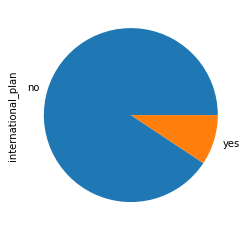

In [ ]:
#df.international_plan.value_counts().plot(kind='pie')
df['international_plan'].value_counts().plot.pie()


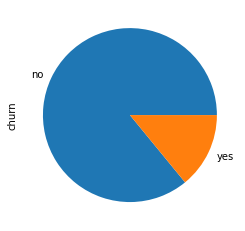

In [ ]:
df['churn'].value_counts().plot.pie()

In [ ]:
churn_y = df.loc[df.churn=='yes','churn'].count()
churn_n = df.loc[df.churn=='no','churn'].count()
churn_t = churn_y + churn_n
print('qunatidade de churn : '+str(churn_t))
print("clientes que tem churn "+str(churn_y)+ ' que representa ' + str(round(100*churn_y/churn_t,0)) + '% da base de clientes')
print('Quantidade de clientes sem churn ' +str(churn_y) + ' que representa ' + str(round(100*churn_n/churn_t,0)) + '% da base de clientes')

qunatidade de churn : 4250
clientes que tem churn 598 que representa 14.0% da base de clientes
Quantidade de clientes sem churn 598 que representa 86.0% da base de clientes


In [ ]:
#checa valores nulos 
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

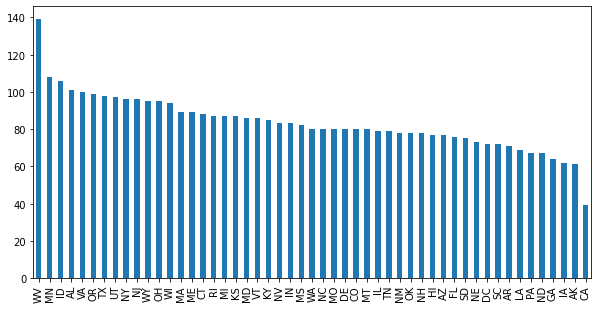

In [ ]:
df.state.value_counts().plot.bar( figsize=(10, 5))

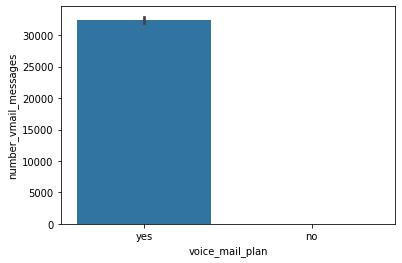

In [ ]:
sns.barplot(x=df.voice_mail_plan, y=df.number_vmail_messages, estimator=sum)

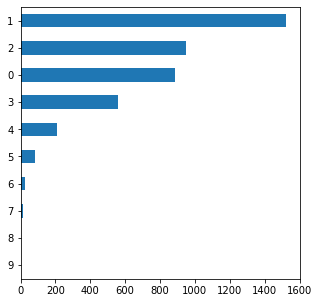

In [ ]:
df.number_customer_service_calls.value_counts( ascending=True).plot.barh(figsize=(5, 5))#grafico horizontal de barras

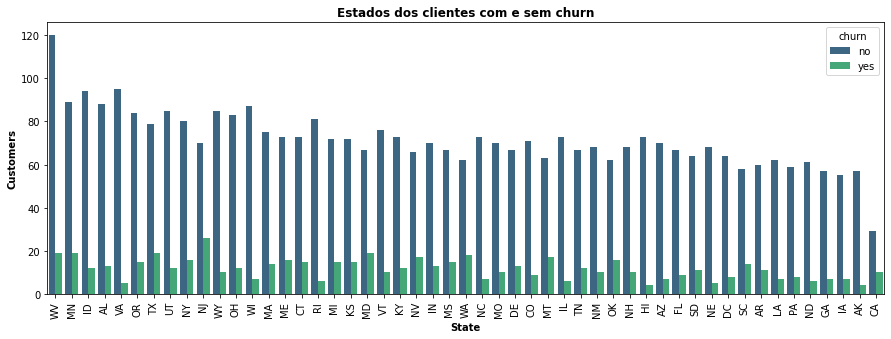

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data = df, x='state', order=df['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Estados dos clientes com e sem churn', fontsize=12, fontweight='bold')
plt.show()

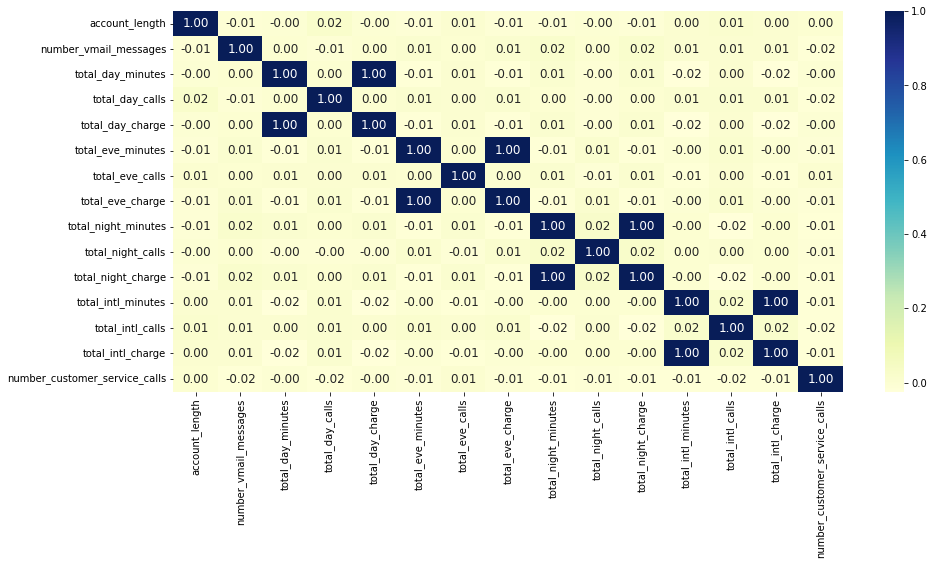

In [ ]:
# Correlação entre as variáveis 
corr = df.corr()
fig2, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

Feature Enginner

In [ ]:
# Feature Engineering 
# Transforma variável churn de sim e não para 1 e 0
df['churn'] = df['churn'].astype('category') 
df['churn'] = df['churn'].cat.codes

In [ ]:
# Transforma voice_mail_plan de sim e não para 1 e 0
df['voice_mail_plan'] = df['voice_mail_plan'].astype('category')
df['voice_mail_plan'] = df['voice_mail_plan'].cat.codes
# Transforma voice_mail_plan de sim e não para 1 e 0
df['international_plan'] = df['international_plan'].astype('category')
df['international_plan'] = df['international_plan'].cat.codes

In [ ]:
# Transforma area_code em numerica
df['area_code'] = df['area_code'].astype('category')
df['area_code'] = df['area_code'].cat.codes

In [ ]:
# Transforma state em numerica
df['state'] = df['state'].astype('category')
df['state'] = df['state'].cat.codes

In [ ]:
df.sample(4)

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
2656,6,147,0,0,0,124.4,74,21.15,320.9,78,...,157.2,126,7.07,10.4,4,2.81,2,0,1,0
842,8,64,0,1,27,201.3,101,34.22,143.8,89,...,150.2,127,6.76,12.3,3,3.32,1,0,1,0
2131,44,117,0,1,20,205.7,98,34.97,136.1,107,...,159.4,147,7.17,8.7,3,2.35,2,0,0,1
4116,19,95,0,0,0,186.4,85,31.69,173.4,100,...,294.7,73,13.26,9.1,5,2.46,1,0,1,0


machine learning

In [ ]:
# Separando variáveis independentes e dependente
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
# Dividindo em treino e teste usando train_test_split, 20% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
xgb_model = XGBClassifier(max_depth=10, 
                          learning_rate=0.1,
                          n_estimators=300, 
                          silent=True,
                          objective='binary:logistic',
                          nthread=-1,
                          missing=np.nan,
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          base_score=0.5, 
                          seed=142)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.9, max_depth=10, n_estimators=300, nthread=-1,
              seed=142, silent=True, subsample=0.9)

In [ ]:
prob = xgb_model.predict_proba(X_test)[:,1]
pred = xgb_model.predict(X_test)

##Score

In [ ]:
print('AUC: '+str(metrics.roc_auc_score(y_test, prob)))
print('Accuracy : '+str(metrics.accuracy_score(y_test, pred)))
print('Recall : '+str(metrics.recall_score(y_test, pred)))
print('F1-Measure : '+str(metrics.f1_score(y_test, pred)))

AUC: 0.9336820925553319
Accuracy : 0.9611764705882353
Recall : 0.8214285714285714
F1-Measure : 0.8745247148288974


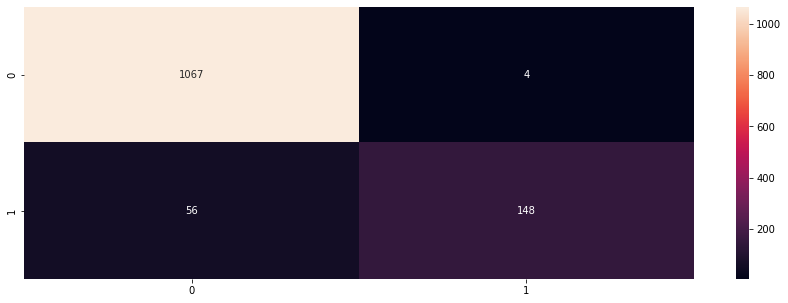

In [ ]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

##Impotancia de cada coluna

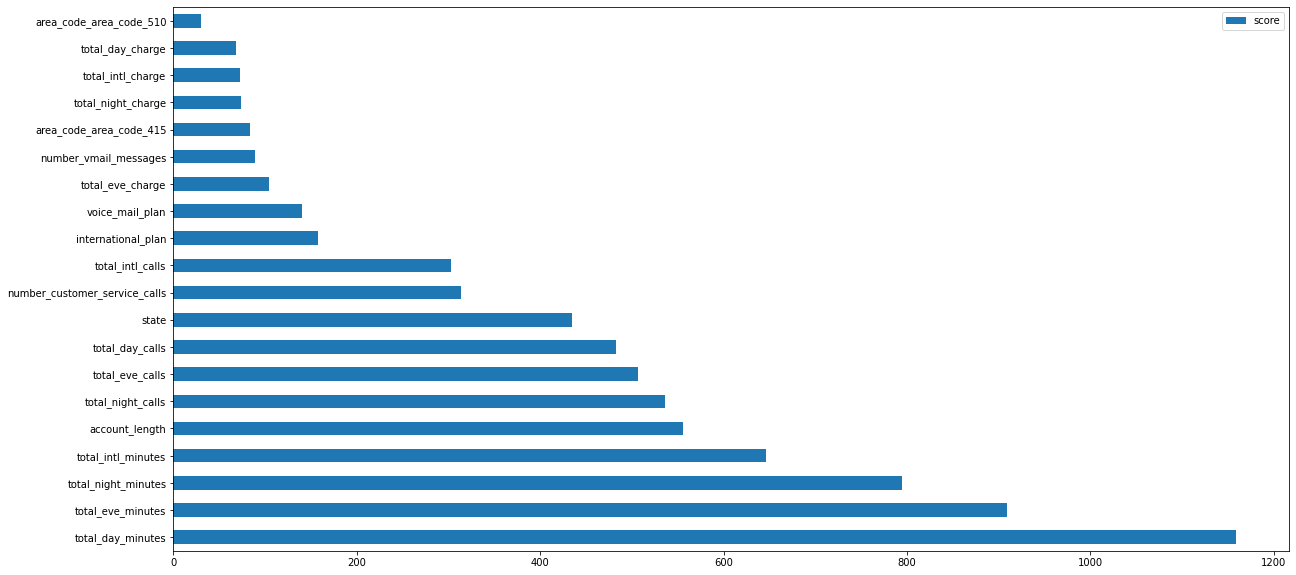

In [ ]:
# Feature Importance 
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=False)
data.nlargest(20, columns='score').plot(kind='barh', figsize = (20,10))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
select_feature = SelectKBest(chi2, k=5).fit(X_test,y_test)
a=select_feature.scores_
b=X_train
df2=pd.DataFrame(list(zip(b, a)),columns=['Column','Score'])

df2['Score'] = df2['Score'].replace(np.nan,0)
df2['Score'] = df2['Score'].astype(int)
df2.sort_values(by='Score', ascending=False)

,Column,Score
5,total_day_minutes,1519
4,number_vmail_messages,367
7,total_day_charge,258
17,number_customer_service_calls,83
8,total_eve_minutes,55
2,international_plan,44
0,state,31
11,total_night_minutes,19
6,total_day_calls,13
3,voice_mail_plan,12


##shap
Interpretabilidade do modelo shap values
https://shap.readthedocs.io/en/latest/index.html

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

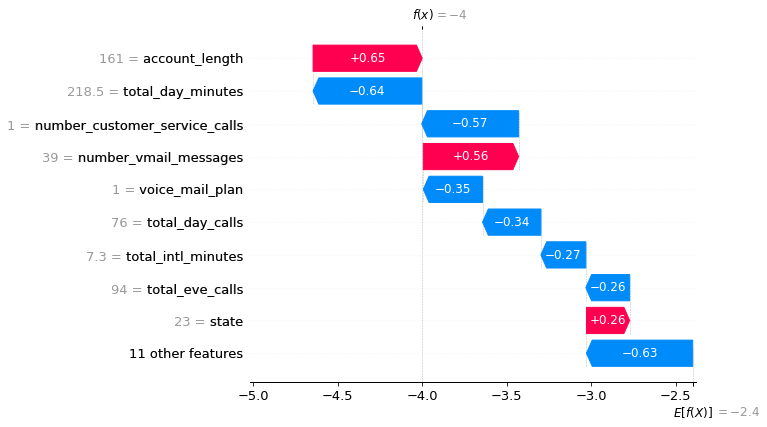

In [ ]:
shap.plots.waterfall(shap_values[0])#maiores pesos por cada linha em relacão churn so pre reforçar esse valor negativo seria tipo maior chance de dar churn, quanto mais negativo maior o peso do churn

In [ ]:
#explainer = shap.TreeExplainer(xgb_model)
#shap_values_2=explainer.shape_values(X_test)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])# grafico de força oque "empurra" para que

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

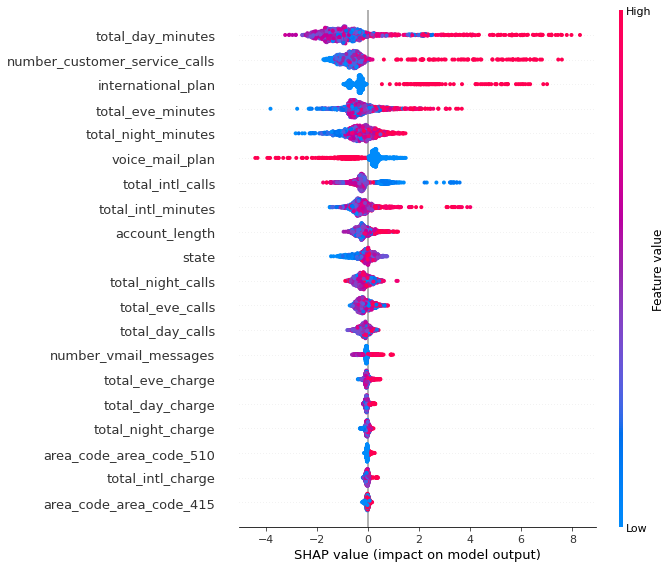

In [ ]:
shap.summary_plot(shap_values)

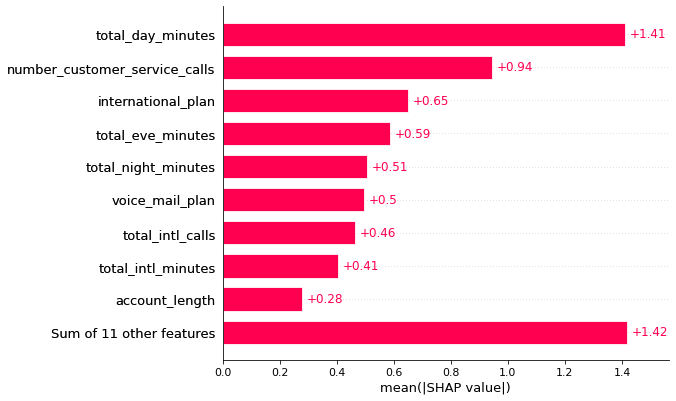

In [ ]:
shap.plots.bar(shap_values)

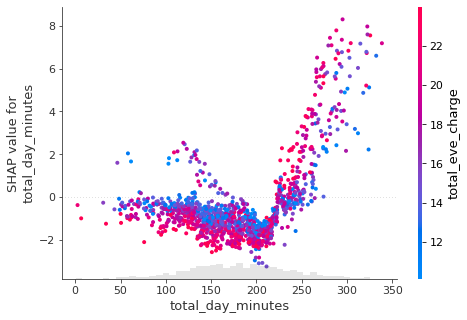

In [ ]:
shap.plots.scatter(shap_values[:,'total_day_minutes'], color=shap_values)

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test.iloc[select]
features_display = X_test.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: [-2.39997387]


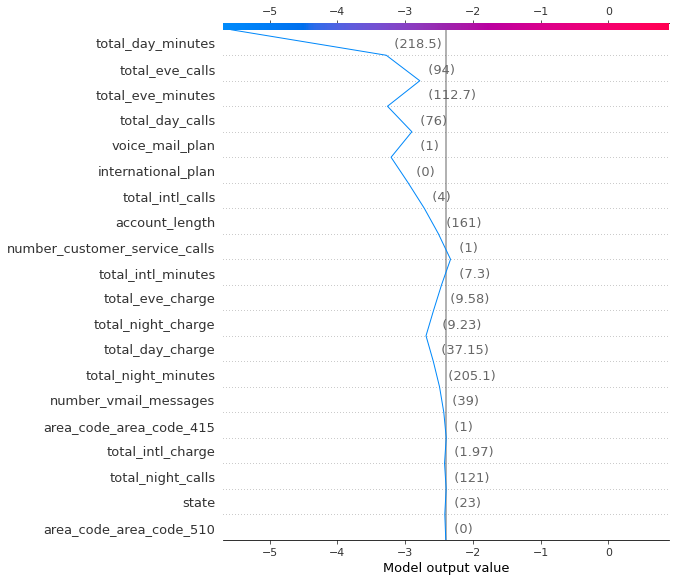

In [ ]:
shap.decision_plot(expected_value, shap_values, features_display)